In [3]:
# Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
import tweepy
from datetime import datetime

In [4]:
# Twitter API Keys
import os
consumer_key = os.getenv("twitter_consumer_key")
consumer_secret = os.getenv("twitter_consumer_secret")
access_token = os.getenv("twitter_access_token_key")
access_token_secret = os.getenv("twitter_access_token_secret")

In [5]:
# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [6]:
# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [41]:
# Create array with news outlet twitter handles
    #newsOutlets = ["BBCWorld", "nytimes"]
newsOutlets = ["BBCWorld", "CBSNews","CNN", "FoxNews", "nytimes"]

In [42]:
# print a single tweet json for reference
test_tweet = api.user_timeline(newsOutlets[0])
print(json.dumps(test_tweet[0], sort_keys=True, indent=4))

{
    "contributors": null,
    "coordinates": null,
    "created_at": "Sun Nov 19 01:50:44 +0000 2017",
    "entities": {
        "hashtags": [],
        "symbols": [],
        "urls": [
            {
                "display_url": "bbc.in/2zPVn5s",
                "expanded_url": "http://bbc.in/2zPVn5s",
                "indices": [
                    55,
                    78
                ],
                "url": "https://t.co/C9tmPrB9Ux"
            }
        ],
        "user_mentions": []
    },
    "favorite_count": 88,
    "favorited": false,
    "geo": null,
    "id": 932063561018494976,
    "id_str": "932063561018494976",
    "in_reply_to_screen_name": null,
    "in_reply_to_status_id": null,
    "in_reply_to_status_id_str": null,
    "in_reply_to_user_id": null,
    "in_reply_to_user_id_str": null,
    "is_quote_status": false,
    "lang": "en",
    "place": null,
    "possibly_sensitive": false,
    "retweet_count": 54,
    "retweeted": false,
    "source": "<a href=\"

In [43]:
# Create array to hold sentiments
sentiment_array = []

In [44]:
# Loop through all media outlets
for outlet in newsOutlets:
    counter = 1   
    
    # For each outlet loop through 5 pages of tweets (total 100 tweets)
    for x in range(5):

        # Get user's tweets, specifying the page
        public_tweets = api.user_timeline(outlet, page=x)

        # Loop through all tweets
        for tweet in public_tweets:
            
            #Get info for each tweet 
                      
            # Get account handle and full user name
            tweet_target = tweet["user"]["screen_name"]
            tweet_name = tweet["user"]["name"]
            
            # Convert tweet date
            converted_time = datetime.strptime(tweet["created_at"], "%a %b %d %H:%M:%S %z %Y")
            
            # Get tweet text
            tweet_text = tweet["text"]
            
            # Run sentiment analysis
            results = analyzer.polarity_scores(tweet["text"])
            pos = results["pos"]
            neg = results["neg"]
            neu = results["neu"]
            comp = results["compound"]
            
            # Place data in a dictionary
            sentiment = {"TweetsAgo":counter,
                         "Target": tweet_target,
                         "User": tweet_name,
                         "Date": converted_time,
                         "Text": tweet_text,
                         "Compound": comp,
                         "Positive": pos,
                         "Neutral": neu,
                         "Negative": neg
                        }
            
            # Append dictionary to master sentiment array
            sentiment_array.append(sentiment)
           
            # **** For testing only print sample tweet info ****           
            print(f"Tweet# {counter}: {outlet}")
            print(f"      name: {tweet_name} |  time: {converted_time} | {tweet_text} ")
            
            # Increment counter
            counter +=1

Tweet# 1: BBCWorld
      name: BBC News (World) |  time: 2017-11-19 01:50:44+00:00 | Zimbabwe: Mugabe to meet with army chief on his future https://t.co/C9tmPrB9Ux 
Tweet# 2: BBCWorld
      name: BBC News (World) |  time: 2017-11-19 01:50:44+00:00 | Argentina missing submarine: Satellite signals detected https://t.co/st2rHs4Cah 
Tweet# 3: BBCWorld
      name: BBC News (World) |  time: 2017-11-19 01:23:25+00:00 | US nuclear chief to resist 'illegal' presidential strike order https://t.co/XXQWDZe5rq 
Tweet# 4: BBCWorld
      name: BBC News (World) |  time: 2017-11-19 01:05:15+00:00 | Jesus in heels? https://t.co/mk7Mkp3n9n 
Tweet# 5: BBCWorld
      name: BBC News (World) |  time: 2017-11-19 00:44:24+00:00 | Family affair https://t.co/wPApViuN2W 
Tweet# 6: BBCWorld
      name: BBC News (World) |  time: 2017-11-19 00:41:01+00:00 | War and waste https://t.co/oKwrAnpNcz 
Tweet# 7: BBCWorld
      name: BBC News (World) |  time: 2017-11-19 00:37:57+00:00 | Satellite spotlight https://t.co/IGXS

Tweet# 61: BBCWorld
      name: BBC News (World) |  time: 2017-11-18 02:57:21+00:00 | Trump puts elephant trophy imports on hold https://t.co/DL7CaOdb2a 
Tweet# 62: BBCWorld
      name: BBC News (World) |  time: 2017-11-18 01:17:25+00:00 | Flying high https://t.co/kP6rbHoVM9 
Tweet# 63: BBCWorld
      name: BBC News (World) |  time: 2017-11-18 01:13:57+00:00 | 1 to 231 million https://t.co/ziDDXUTYgK 
Tweet# 64: BBCWorld
      name: BBC News (World) |  time: 2017-11-18 00:57:57+00:00 | Billionaire v news anchor https://t.co/tDNgsj8TXu 
Tweet# 65: BBCWorld
      name: BBC News (World) |  time: 2017-11-18 00:33:34+00:00 | Deadly selfies https://t.co/SF4nIKnM55 
Tweet# 66: BBCWorld
      name: BBC News (World) |  time: 2017-11-18 00:30:26+00:00 | Media battleground https://t.co/qHz6USbUIs 
Tweet# 67: BBCWorld
      name: BBC News (World) |  time: 2017-11-18 00:23:25+00:00 | Bitter rivalry https://t.co/Ja0ziqVFVU 
Tweet# 68: BBCWorld
      name: BBC News (World) |  time: 2017-11-18 00:20:2

Tweet# 21: CBSNews
      name: CBS News |  time: 2017-11-19 03:48:06+00:00 | Man confesses in church to murder after DNA composite sketch released, sheriff says https://t.co/5Kvj4D7Tjr https://t.co/WRQTFNYuE8 
Tweet# 22: CBSNews
      name: CBS News |  time: 2017-11-19 03:40:05+00:00 | Grateful Dead's longtime lawyer's widow auctions rare memorabilia https://t.co/bTuWzKbSsZ https://t.co/fNYznZlyuP 
Tweet# 23: CBSNews
      name: CBS News |  time: 2017-11-19 03:33:04+00:00 | California mom shot with kids in rampage says drivers wouldn't stop to help https://t.co/I4iOLZ20to https://t.co/7pNG0mEIUn 
Tweet# 24: CBSNews
      name: CBS News |  time: 2017-11-19 03:18:07+00:00 | Trump administration threatens to shutter Palestinians' D.C. office https://t.co/hse8OTyQEr https://t.co/IGbm3onITE 
Tweet# 25: CBSNews
      name: CBS News |  time: 2017-11-19 03:03:06+00:00 | Nicki Minaj poses for scandalous Paper magazine cover https://t.co/eIrfoKKbEL https://t.co/JUO57jULT7 
Tweet# 26: CBSNews
   

Tweet# 81: CBSNews
      name: CBS News |  time: 2017-11-18 12:33:05+00:00 | Deputies "wouldn't do anything" to stop California gunman, resident says https://t.co/sR820CvgOv https://t.co/R1U3V6nEzw 
Tweet# 82: CBSNews
      name: CBS News |  time: 2017-11-18 12:18:07+00:00 | Air safety authorities investigate mid-air collision near London https://t.co/Cngmxuqi6M https://t.co/1VmZNxVLrD 
Tweet# 83: CBSNews
      name: CBS News |  time: 2017-11-18 12:03:05+00:00 | Can Alabama's evangelicals carry Roy Moore to victory? https://t.co/F78vXwefFH https://t.co/MFG6MG1tub 
Tweet# 84: CBSNews
      name: CBS News |  time: 2017-11-18 11:48:04+00:00 | California mom shot with kids in rampage says drivers wouldn't stop to help https://t.co/h6IicdRr4a https://t.co/MwVlMJcm9L 
Tweet# 85: CBSNews
      name: CBS News |  time: 2017-11-18 11:33:04+00:00 | Roger Stone appears to have known about Al Franken allegations before they went public https://t.co/vWC8VDfIFw https://t.co/nDD71pNOHX 
Tweet# 86: CBS

Tweet# 41: CNN
      name: CNN |  time: 2017-11-18 20:45:05+00:00 | The policy that the US porn industry has and Facebook needs (via @CNNOpinion) https://t.co/0Q4nGusLrB https://t.co/y8oSkRwsa1 
Tweet# 42: CNN
      name: CNN |  time: 2017-11-18 20:30:06+00:00 | A police officer in western Pennsylvania has been fatally shot after a traffic stop https://t.co/EBAVqcxFgv https://t.co/9qmie6pUAy 
Tweet# 43: CNN
      name: CNN |  time: 2017-11-18 20:19:39+00:00 | The drug convictions of 15 men in Chicago have been thrown out after they claimed a police sergeant and his team of… https://t.co/QxPnYBa3fc 
Tweet# 44: CNN
      name: CNN |  time: 2017-11-18 20:02:39+00:00 | LaVar Ball has belittled President Trump's role in the release of his son and two other UCLA basketball players who… https://t.co/nYXtRVMrbt 
Tweet# 45: CNN
      name: CNN |  time: 2017-11-18 19:45:07+00:00 | Here's your ultimate holiday shopping guide to Black Friday https://t.co/pAaYYiRT0u https://t.co/TLROENYfe8 
Tweet# 

Tweet# 1: FoxNews
      name: Fox News |  time: 2017-11-19 03:55:02+00:00 | 'Chainsaw nun' who helped Hurricane Irma cleanup honored by @MiamiHeat https://t.co/kaFjpaTfMh https://t.co/XYdffk9rFb 
Tweet# 2: FoxNews
      name: Fox News |  time: 2017-11-19 03:52:00+00:00 | Jeff Flake: GOP is 'toast' if it becomes party of Trump, Moore https://t.co/CmmRnWEp4i 
Tweet# 3: FoxNews
      name: Fox News |  time: 2017-11-19 03:41:00+00:00 | Clifford May on @POTUS' Asia trip: "The Trump administration and the president himself, they're articulating good,… https://t.co/7cQ9CtOR1s 
Tweet# 4: FoxNews
      name: Fox News |  time: 2017-11-19 03:37:00+00:00 | Anarchists Vandalize Philadelphia Police Station and Cars https://t.co/hKlIo5AiDQ 
Tweet# 5: FoxNews
      name: Fox News |  time: 2017-11-19 03:32:00+00:00 | Two Quinnipiac University students charged for setting fires in dorm https://t.co/bZjFWyazcS 
Tweet# 6: FoxNews
      name: Fox News |  time: 2017-11-19 03:29:07+00:00 | Lotter on @Rosie: 

Tweet# 61: FoxNews
      name: Fox News |  time: 2017-11-19 00:13:44+00:00 | 'Chainsaw nun' who helped Hurricane Irma cleanup honored by @MiamiHeat https://t.co/kaFjpaBEUJ https://t.co/f3kwgl1O8a 
Tweet# 62: FoxNews
      name: Fox News |  time: 2017-11-19 00:09:32+00:00 | Amb. Dennis Ross on North Korea attacking the US: "It would be suicidal for [Kim Jong Un] to launch a nuclear strik… https://t.co/z4lEV9BUJw 
Tweet# 63: FoxNews
      name: Fox News |  time: 2017-11-19 00:03:31+00:00 | .@TheWorldsFrates: "The era of the Clintons is over." https://t.co/hRqhPm7nxY https://t.co/GlkzGZt3PS 
Tweet# 64: FoxNews
      name: Fox News |  time: 2017-11-18 23:54:02+00:00 | Roy Moore slams Gloria Allred, challenges her to release 'fake yearbook' https://t.co/JixCBHYUqr 
Tweet# 65: FoxNews
      name: Fox News |  time: 2017-11-18 23:40:20+00:00 | Dem candidate apologizes after boasting of 'hayloft' romp, sex with 50 women https://t.co/9uXusHYAHu 
Tweet# 66: FoxNews
      name: Fox News |  time: 2

Tweet# 21: nytimes
      name: The New York Times |  time: 2017-11-19 03:53:13+00:00 | An Earth-sized planet about 11 light-years from Earth could hold liquid water and conditions favorable for life https://t.co/UrkNRgBAph 
Tweet# 22: nytimes
      name: The New York Times |  time: 2017-11-19 03:34:25+00:00 | Honda Recalls 800,000 Odyssey Minivans Because of Seat Latches https://t.co/yiKRjaz7q5 
Tweet# 23: nytimes
      name: The New York Times |  time: 2017-11-19 03:31:13+00:00 | Wealth Matters: Tax Cuts for Small-Business Owners? It’s Complicated https://t.co/A38aIF6q1w 
Tweet# 24: nytimes
      name: The New York Times |  time: 2017-11-19 03:17:17+00:00 | See the last moments of the bidding war for Leonardo DaVinci’s "Salvator Mundi," which sold for $450.3 million https://t.co/G4nd2ga0E3 
Tweet# 25: nytimes
      name: The New York Times |  time: 2017-11-19 02:59:33+00:00 | With obesity soaring, focus has turned to soda taxes. What happened in Colombia shows how ugly it can get. htt

Tweet# 81: nytimes
      name: The New York Times |  time: 2017-11-18 14:21:07+00:00 | What’s new on Netflix, HBO and Amazon Prime this weekend https://t.co/QQUCRudr4w 
Tweet# 82: nytimes
      name: The New York Times |  time: 2017-11-18 14:18:40+00:00 | Republican Governors’ 2018 Dilemma: What to Do About Trump? https://t.co/hl1ebxW3zJ 
Tweet# 83: nytimes
      name: The New York Times |  time: 2017-11-18 14:02:09+00:00 | In 2005 she wrote that she loved her husband more than she did their 4 children. The backlash was swift and vicious. https://t.co/CzBvw4QUa6 
Tweet# 84: nytimes
      name: The New York Times |  time: 2017-11-18 13:43:42+00:00 | Slavery Ensnares Thousands in U.K. Here’s One Teenage Girl’s Story. https://t.co/1ljg2hYOs6 
Tweet# 85: nytimes
      name: The New York Times |  time: 2017-11-18 13:41:03+00:00 | In the U.S., the richest 1% have seen their share of national income roughly double since 1980. Why? https://t.co/DuVnKbXMxi 
Tweet# 86: nytimes
      name: The Ne

In [45]:
# Verify there are 500 total tweets (100 from each)
len(sentiment_array)

500

In [46]:
# Create data frame
sentiments_df = pd.DataFrame(sentiment_array)

#Force column order
sentiments_df = sentiments_df[["TweetsAgo","Target","User","Date","Positive","Neutral","Negative","Compound","Text"]]
sentiments_df.head()

,TweetsAgo,Target,User,Date,Positive,Neutral,Negative,Compound,Text
0,1,BBCWorld,BBC News (World),2017-11-19 01:50:44+00:00,0.0,1.000,0.000,0.000,Zimbabwe: Mugabe to meet with army chief on hi...
1,2,BBCWorld,BBC News (World),2017-11-19 01:50:44+00:00,0.0,0.732,0.268,-0.296,Argentina missing submarine: Satellite signals...
2,3,BBCWorld,BBC News (World),2017-11-19 01:23:25+00:00,0.0,0.857,0.143,-0.128,US nuclear chief to resist 'illegal' president...
3,4,BBCWorld,BBC News (World),2017-11-19 01:05:15+00:00,0.0,1.000,0.000,0.000,Jesus in heels? https://t.co/mk7Mkp3n9n
4,5,BBCWorld,BBC News (World),2017-11-19 00:44:24+00:00,0.0,1.000,0.000,0.000,Family affair https://t.co/wPApViuN2W


In [47]:
# Sort data frame by target and tweets ago
sentiments_df = sentiments_df.sort_values(["Target","TweetsAgo"], ascending=[True, False])
    #sentiments_df.head()

,TweetsAgo,Target,User,Date,Positive,Neutral,Negative,Compound,Text
99,100,BBCWorld,BBC News (World),2017-11-17 09:42:25+00:00,0.000,1.000,0.000,0.0000,Mugabe makes first public appearance https://t...
98,99,BBCWorld,BBC News (World),2017-11-17 10:01:13+00:00,0.000,1.000,0.000,0.0000,The humanoid robot that can do a backflip http...
97,98,BBCWorld,BBC News (World),2017-11-17 10:18:56+00:00,0.231,0.769,0.000,0.2023,Africa's top shots: 10-16 November 2017 https:...
96,97,BBCWorld,BBC News (World),2017-11-17 10:31:52+00:00,0.208,0.792,0.000,0.2732,Tesla shows off new truck and surprise Roadste...
95,96,BBCWorld,BBC News (World),2017-11-17 10:44:02+00:00,0.000,0.676,0.324,-0.3400,Fire rips through Cameroon parliament https://...


In [ ]:
# Save twitter data to CSV file
sentiments_df.to_csv("recentTweets.csv", encoding="utf-8", index=False)

In [48]:
# Create charting data frames for each type
BBC_df = sentiments_df[sentiments_df["Target"]=="BBCWorld"]
CBS_df = sentiments_df[sentiments_df["Target"]=="CBSNews"]
CNN_df = sentiments_df[sentiments_df["Target"]=="CNN"]
FOX_df = sentiments_df[sentiments_df["Target"]=="FoxNews"]
NYT_df = sentiments_df[sentiments_df["Target"]=="nytimes"]

In [49]:
#Plot each outlets scatter graph
plt.scatter(BBC_df["TweetsAgo"], BBC_df["Compound"], marker="o", facecolors="gold", edgecolors="black", label="BBCWorld", alpha=0.75)
plt.scatter(CBS_df["TweetsAgo"], CBS_df["Compound"], marker="o", facecolors="blue", edgecolors="black", label="CBSNews", alpha=0.75)
plt.scatter(CNN_df["TweetsAgo"], CNN_df["Compound"], marker="o", facecolors="green", edgecolors="black", label="CNN", alpha=0.75)
plt.scatter(FOX_df["TweetsAgo"], FOX_df["Compound"], marker="o", facecolors="red", edgecolors="black", label="FoxNews", alpha=0.75)
plt.scatter(NYT_df["TweetsAgo"], NYT_df["Compound"], marker="o", facecolors="lightblue", edgecolors="black", label="NYTimes", alpha=0.75)

In [50]:
# Add labels to the x and y axes
curDate = datetime.now().date()
plt.title(f"Sentiment Analysis of Media Tweets as of {curDate}")
plt.xlabel("Tweets Ago")
plt.ylabel("Tweet Polarity")

In [51]:
# Set your x and y limits
plt.xlim(100, 0)
plt.ylim(-1, 1)

(-1, 1)

In [52]:
# Set a grid on plot and format legend
plt.grid()
#plt.legend(bbox_to_anchor=(0, 1), loc='upper left', ncol=1)
lgnd= plt.legend(bbox_to_anchor=(1.3, 1), loc="upper right", scatterpoints=1, fontsize=10, title="Media Outlets")
lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]
lgnd.legendHandles[2]._sizes = [30]
lgnd.legendHandles[3]._sizes = [30]
lgnd.legendHandles[4]._sizes = [30]

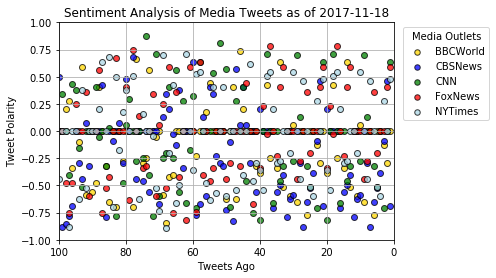

In [53]:
# Save and show plot
plt.savefig("SentimentScatterPlot.png")
plt.show()

In [54]:
# Group the data by media outlet
groupedNews = sentiments_df.groupby(["Target"], as_index=False)
    #groupedNews.head()

,TweetsAgo,Target,User,Date,Positive,Neutral,Negative,Compound,Text
99,100,BBCWorld,BBC News (World),2017-11-17 09:42:25+00:00,0.000,1.000,0.000,0.0000,Mugabe makes first public appearance https://t...
98,99,BBCWorld,BBC News (World),2017-11-17 10:01:13+00:00,0.000,1.000,0.000,0.0000,The humanoid robot that can do a backflip http...
97,98,BBCWorld,BBC News (World),2017-11-17 10:18:56+00:00,0.231,0.769,0.000,0.2023,Africa's top shots: 10-16 November 2017 https:...
96,97,BBCWorld,BBC News (World),2017-11-17 10:31:52+00:00,0.208,0.792,0.000,0.2732,Tesla shows off new truck and surprise Roadste...
95,96,BBCWorld,BBC News (World),2017-11-17 10:44:02+00:00,0.000,0.676,0.324,-0.3400,Fire rips through Cameroon parliament https://...
199,100,CBSNews,CBS News,2017-11-18 07:48:05+00:00,0.211,0.789,0.000,0.4939,Bonn Climate Conference addresses U.S. decisio...
198,99,CBSNews,CBS News,2017-11-18 08:03:05+00:00,0.178,0.337,0.485,-0.8779,"Serial killer says he hopes his ""slow, painful..."
197,98,CBSNews,CBS News,2017-11-18 08:18:08+00:00,0.000,0.585,0.415,-0.8591,60 Minutes tells the story of the worst sports...
196,97,CBSNews,CBS News,2017-11-18 08:33:05+00:00,0.000,0.635,0.365,-0.7845,"Montana Rep. blamed ""liberal media"" to authori..."
195,96,CBSNews,CBS News,2017-11-18 08:48:07+00:00,0.000,0.749,0.251,-0.6908,Man confesses in church to murder after DNA co...


In [55]:
# Get the average Compound sentiment
avgComp = groupedNews["Compound"].mean()
avgComp.head()

,Target,Compound
0,BBCWorld,-0.103429
1,CBSNews,-0.216339
2,CNN,-0.052329
3,FoxNews,-0.020294
4,nytimes,-0.043804


In [56]:
# Set up arrays for charting
bar_outlets = avgComp["Target"]
bar_Compound = avgComp["Compound"]
x_axis = np.arange(0, len(bar_Compound), 1)

In [77]:
# Create a bar chart based upon the above data
plt.bar(x_axis, bar_Compound, color=["gold","blue","green","red","lightblue"], align="edge")

<Container object of 5 artists>

In [78]:
# Create the ticks for our bar chart's x axis
tick_locations = [value+0.4 for value in x_axis]
plt.xticks(tick_locations, bar_outlets)

([<matplotlib.axis.XTick at 0x22477daa898>,
 <a list of 5 Text xticklabel objects>)

In [79]:
# Set the limits of the x axis
plt.xlim(-0.25, len(x_axis))

# Set the limits of the y axis
plt.ylim(-.3, .1)

(-0.3, 0.1)

In [80]:

# Give the chart a title, x label, and y label
plt.title(f"Overall Media Sentiment Based on Twitter as of {curDate}")
plt.xlabel("Outlets")
plt.ylabel("Tweet Polarity")

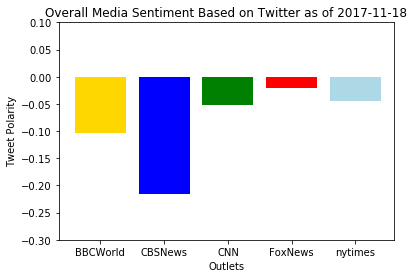

In [81]:
# Save an image of the chart and print it to the screen
plt.savefig("BarSentiment.png")
plt.show()